Ashley Foster 
Project 3 - Part A - Linear Regression Model
11/19/25

First step: Import libraries and read in the dataset that I am working with.

In [2]:
import pandas as pd

df = pd.read_csv('cleaned_data_project3.csv')
df.head()

,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,...,x26,x28,x29,x30,x31,x4,x6,x2_freq,x24_freq,x29_freq
0,0,1,#54359,Female,50,5,5,5,4,3,...,Bt,1,(192&&),0,2.380952,4,50,1,1082,337
1,1,1,#84649,Female,44,1,1,1,1,3,...,Bt,1,(1034&&),0,inf,4,44,1,58612,71
2,2,0,#59015,Female,72,3,1,5,5,3,...,Bt,3,(1452&&),0,inf,4,72,1,1412,90
3,3,0,#99990,Female,38,1,3,1,3,5,...,PT,3,(916&&),0,inf,4,38,1,58612,19
4,4,1,#83569,Male,37,5,5,5,5,2,...,Bt,1,(390&&),0,inf,4,37,1,58612,57


Here, I am making sure that there is no missing data. If there is, then I am filling it. Replacing special characters and changing 'Female" and 'Male' to 0 and 1, respectively. 

In [3]:
df.fillna('0', inplace=True)
df.drop(columns = ['x31'], inplace=True)  # Dropping x31 because it had too many missing values
df = df.replace(r'#','', regex = True)
df = df.replace(r'\(', '', regex = True)
df = df.replace(r'\)', '', regex = True)
df = df.replace('&', '', regex = True)
df = df.replace('Female', 0, regex = True)
df = df.replace('Male', 1, regex = True)
df = df.rename(columns = {'x3':'gender', 'x5':'age'})
df['x14'] = df['x14'].replace(' ', 0, regex = True).astype(int)
df['x2'] = df['x2'].astype(int)
df['x29'] = df['x29'].astype(int)
df['x25'] = df['x25'].replace(r'D\_C', 0, regex = True)
df['x25'] = df['x25'].replace(r'L\_C', 1, regex = True)
df['x26'] = df['x26'].replace('Bt', 0, regex= True)
df['x26'] = df['x26'].replace('PT', 1, regex= True)
df.head(20)

C:\Users\Ashley\AppData\Local\Temp\ipykernel_26016\1887764986.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Male', 1, regex = True)
C:\Users\Ashley\AppData\Local\Temp\ipykernel_26016\1887764986.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['x25'] = df['x25'].replace(r'L\_C', 1, regex = True)
C:\Users\Ashley\AppData\Local\Temp\ipykernel_26016\1887764986.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitl

,Unnamed: 0,y,x2,gender,age,x9,x10,x11,x12,x13,...,x25,x26,x28,x29,x30,x4,x6,x2_freq,x24_freq,x29_freq
0,0,1,54359,0,50,5,5,5,4,3,...,0,0,1,192,0,4,50,1,1082,337
1,1,1,84649,0,44,1,1,1,1,3,...,1,0,1,1034,0,4,44,1,58612,71
2,2,0,59015,0,72,3,1,5,5,3,...,1,0,3,1452,0,4,72,1,1412,90
3,3,0,99990,0,38,1,3,1,3,5,...,1,1,3,916,0,4,38,1,58612,19
4,4,1,83569,1,37,5,5,5,5,2,...,1,0,1,390,0,4,37,1,58612,57
5,5,1,91,0,41,5,5,5,3,2,...,0,0,1,304,0,4,41,1,703,271
6,6,0,19842,1,37,3,2,2,2,3,...,1,0,2,475,0,4,37,1,58612,54
7,7,0,89649,1,11,1,2,0,4,1,...,0,0,3,639,0,4,11,1,58612,80
8,8,0,94533,1,58,2,5,2,3,2,...,1,1,3,862,0,4,58,1,447,372
9,9,0,46478,1,12,1,4,1,4,1,...,1,1,3,794,0,4,12,1,1918,73


Now I begin using the Linear Regression learning model to assess my data.

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

y = df['y']
x = df.drop(columns=['y'])
#I used a Google random number generator to pick 93: 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 93) 

#Selecting the model:
lr = LogisticRegression()

Next, parameter tuning to get the best results. I took these lines of code from the Week 10 Live coding assignment Live_Coding_scikit-learn_ML.ipynb

In [5]:
param_grid_lg = {'solver': ['saga', 'liblinear'],
                  'penalty': ['l1','l2'],
                 'C': [0.001,0.01,0.1,1,10,100,1000],
                  'max_iter' : [10,100,500, 1000]}

# Initialize GridSearchCV
lg_grid = RandomizedSearchCV(estimator=LogisticRegression(),  # the model
                            param_distributions=param_grid_lg,  # hyperparameter space
                             scoring='roc_auc')  # default: 5 folder cross-validation

# Fit to the training data
lg_grid.fit(x_train, y_train)

c:\Users\Ashley\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means

: 

: 

The best parameters are:
Penalty: 'l1'
C: 0.01
solver: 'liblinear'
max_iter" 100

In [ ]:
print(lg_grid.best_params_)
best_lg = lg_grid.best_estimator_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.01}


In [ ]:
#This block is so that I do not have to run the hyperparameter tuning again.
best_params = {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.01}
best_lg = LogisticRegression(**best_params)
best_lg.fit(x_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


Now moving on to measuring how good the Linear Regression model was able to fit the dataset.

In [6]:
import seaborn as sns

#Accuracy
acc = metrics.accuracy_score(y_test, best_lg.predict(x_test))
print(f'Accuracy: {acc:.4f}')

#precision
prec = metrics.precision_score(y_test, best_lg.predict(x_test))
print(f'Precision: {prec:.4f}')

#recall
rec = metrics.recall_score(y_test, best_lg.predict(x_test))
print(f'Recall: {rec:.4f}')

#F1 Score
f1 = metrics.f1_score(y_test, best_lg.predict(x_test))
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8763
Precision: 0.8744
Recall: 0.8327
F1 Score: 0.8530


Now, for the confusion matrix and the Roc-AUC curve.

<Axes: >

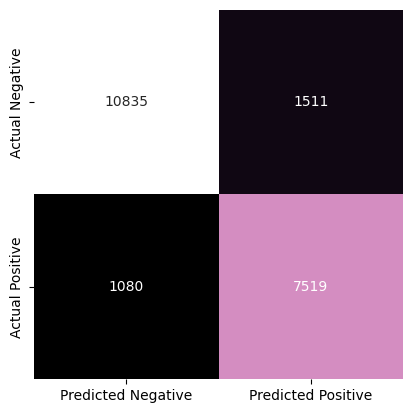

In [7]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, best_lg.predict(x_test))
sns.heatmap(cm.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'cubehelix',
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive'])

Roc-AUC: 0.9276


c:\Users\Ashley\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


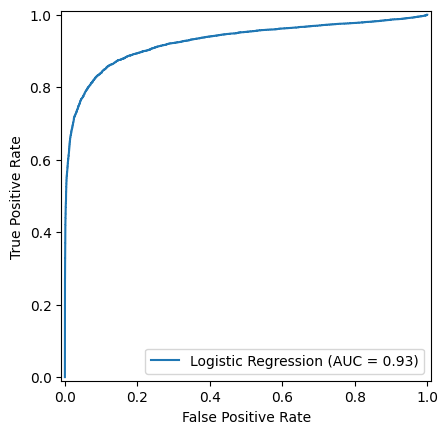

In [8]:
#This is the ROC-AUC for testing. 
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_lg.predict_proba(x_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(f'Roc-AUC: {roc_auc:.4f}')
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic Regression')
display.plot()

Roc-AUC (Train): 0.9277


c:\Users\Ashley\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


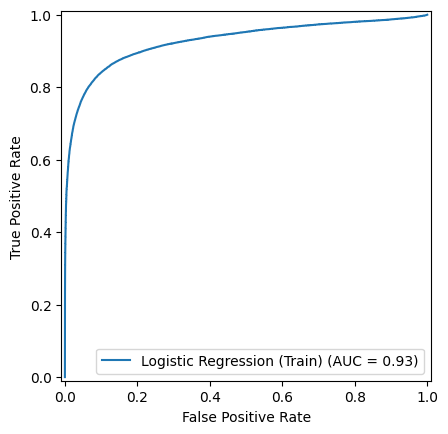

In [9]:
#This is the ROC-AUC for training.
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, best_lg.predict_proba(x_train)[:,1])
roc_auc_train = metrics.auc(fpr_train, tpr_train)
print(f'Roc-AUC (Train): {roc_auc_train:.4f}')
display_train = metrics.RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train,estimator_name='Logistic Regression (Train)')
display_train.plot()